In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from collections import Counter
import category_encoders as ce
import scipy.stats as stats
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency
import matplotlib.pyplot as plt
import seaborn as sns
#data is age	workclass	education	education.num	marital.status	occupation	relationship	race	Gender	capital.gain	capital.loss	hours.per.week	native.country	income	income_value

df = pd.read_csv(r"census_income_original_2.csv")
df['income>50k'] = df['income'].apply(lambda x: 1 if x == '>50K' else 0)
df.drop(columns=['income'], inplace=True)
df_cleaned = df

df_cleaned['income_value'] = pd.to_numeric(df['income_value'], errors='coerce')
df_cleaned = df[~((df['income_value'] < 50000) & (df['income>50k'] == 1))]
df_cleaned = df[~((df['income_value'] >= 50000) & (df['income>50k'] == 0))]
mapping = {
    'm': 0,
    'm ': 0,
    'M': 0,
    'malee': 0,
    'male ': 0,
    'male': 0,
    'Male': 0,
    'Female': 1,
    'female': 1,
    'f': 1
}

df_cleaned['Gender'] = df['Gender'].map(mapping)

C:\Users\t-aelmiggabbar\AppData\Local\Temp\ipykernel_15280\1860354005.py:17: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r"census_income_original_2.csv")
C:\Users\t-aelmiggabbar\AppData\Local\Temp\ipykernel_15280\1860354005.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Gender'] = df['Gender'].map(mapping)


C:\Users\t-aelmiggabbar\AppData\Local\Temp\ipykernel_15280\2215834780.py:37: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  cramer.fillna(value=np.nan,inplace=True)


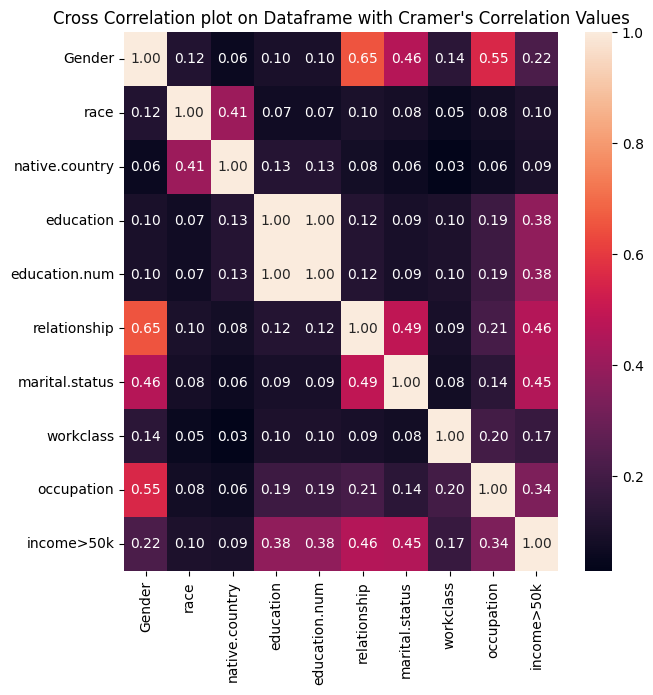

In [21]:
def cramerV(label,x):
    confusion_matrix = pd.crosstab(label, x)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    r,k = confusion_matrix.shape
    phi2 = chi2/n
    phi2corr = max(0,phi2-((k-1)*(r-1))/(n-1))
    rcorr = r - ((r - 1) ** 2) / ( n - 1 )
    kcorr = k - ((k - 1) ** 2) / ( n - 1 )
    try:
        if min((kcorr - 1),(rcorr - 1)) == 0:
            warnings.warn(
            "Unable to calculate Cramer's V using bias correction. Consider not using bias correction",RuntimeWarning)
            v = 0
            print("If condition Met: ",v)
        else:
            v = np.sqrt(phi2corr / min((kcorr - 1), (rcorr - 1)))
            #print("Else condition Met: ",v)
    except:
        print("inside error")
        v = 0
    return v
def plot_cramer(df):
    cramer = pd.DataFrame(index=df.columns,columns=df.columns)
    for column_of_interest in df.columns:
        try:
            temp = {}

            columns = df.columns
            for j in range(0,len(columns)):
                v = cramerV(df[column_of_interest],df[columns[j]])
                cramer.loc[column_of_interest,columns[j]] = v
                if (column_of_interest==columns[j]):
                    pass
                else:
                    temp[columns[j]] = v
            cramer.fillna(value=np.nan,inplace=True)
        except:
            print('Dropping row:',column_of_interest)
            pass
    plt.figure(figsize=(7,7))
    sns.heatmap(cramer,annot=True,fmt='.2f')

    plt.title("Cross Correlation plot on Dataframe with Cramer's Correlation Values")
    plt.show()
cat_cols = ['Gender', 'race', 'native.country', 'education', 'education.num', 'relationship', 'marital.status', 'workclass', 'occupation', 'income>50k']
plot_cramer(df_cleaned[cat_cols])  

C:\Users\t-aelmiggabbar\AppData\Local\Temp\ipykernel_15280\2666398865.py:5: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r"census_income_original_2.csv")
C:\Users\t-aelmiggabbar\AppData\Local\Temp\ipykernel_15280\2215834780.py:37: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  cramer.fillna(value=np.nan,inplace=True)


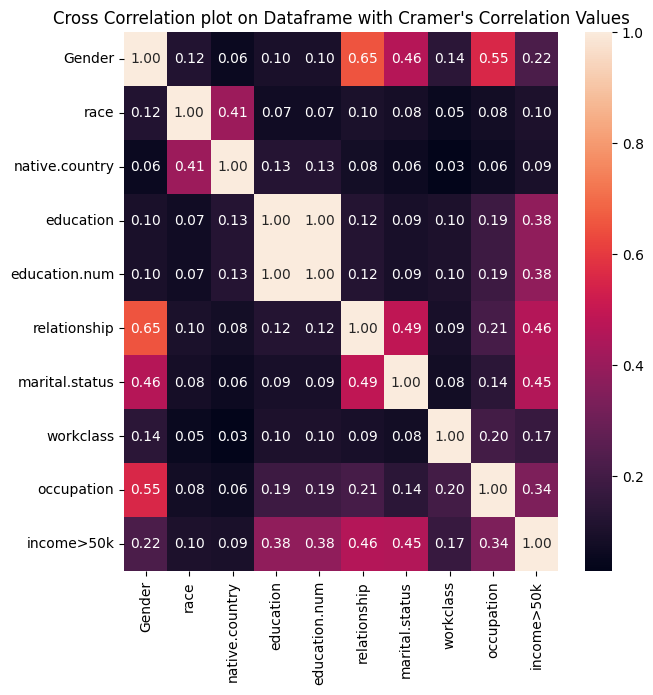

In [43]:
import pandas as pd
import numpy as np

# Load the data
df = pd.read_csv(r"census_income_original_2.csv")

# Step 1: Create df2 with only categorical columns
cat_cols = ['Gender', 'race', 'native.country', 'education', 'education.num', 
            'relationship', 'marital.status', 'workclass', 'occupation', 'income>50k']
df2 = df_cleaned[cat_cols].copy()

for col in cat_cols:
    # Replace '?' with NaN
    df2[col] = df2[col].replace('?', np.nan)
    mode_value = df2[col].mode()[0]
    df2[col] = df2[col].fillna(mode_value)

plot_cramer(df2)

In [57]:
def create_family_status(row):
    if row['marital.status'] == 'Married-civ-spouse':
        return 'Married-with-family' if row['relationship'] in ['Husband', 'Wife'] else 'Married-alone'
        
    if row['marital.status'] == 'Never-married':
        return 'Single-with-family' if row['relationship'] in ['Own-child', 'Other-relative'] else 'Single-alone'
        
    if row['marital.status'] == 'Divorced':
        return 'Divorced-with-family' if row['relationship'] != 'Not-in-family' else 'Divorced-alone'
    if row['marital.status'] == 'Widowed':
        return 'Widowed-with-family' if row['relationship'] != 'Not-in-family' else 'Widowed-alone'
    if row['marital.status'] == 'Separated':
        return 'Separated-with-family' if row['relationship'] != 'Not-in-family' else 'Separated-alone'
    return 'Not-in-Family'  # Default category for any other cases

df3 = df2.copy()
df3['family_status'] = df3.apply(create_family_status, axis=1)
df3.drop(['marital.status', 'relationship'], axis=1, inplace=True)

In [55]:
df3['family_status'].value_counts()

family_status
Married-with-family      15328
Single-alone              5655
Single-with-family        5121
Divorced-alone            2441
Divorced-with-family      2050
Separated-with-family      610
Widowed-alone              559
Widowed-with-family        452
Not-in-Family              444
Separated-alone            432
Married-alone              240
Name: count, dtype: int64

C:\Users\t-aelmiggabbar\AppData\Local\Temp\ipykernel_15280\2215834780.py:37: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  cramer.fillna(value=np.nan,inplace=True)


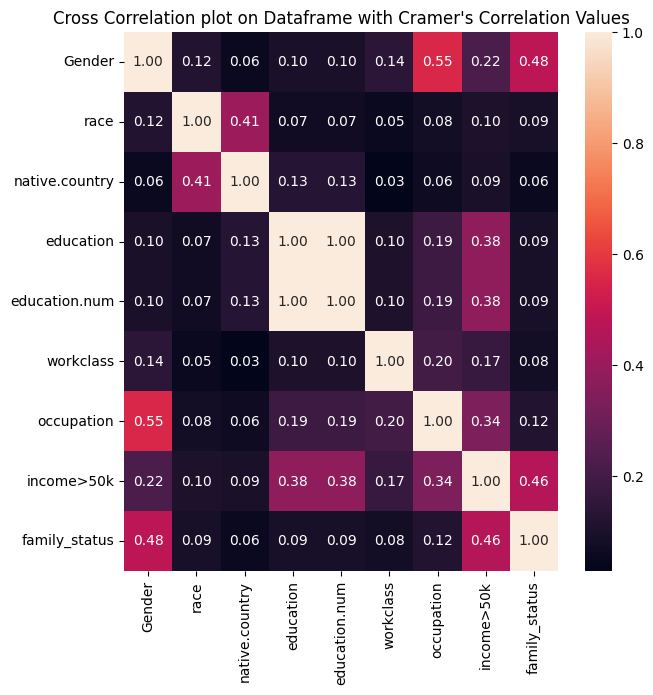

In [56]:
plot_cramer(df3)